# Processing of a TEXT DATA using NLP



1.   Text Preprocessing

*   Removal of Punctuation Marks

*   Removal of stop words

*  Coversion of sentances into words




2.  Bag of words ----Word counts

3.  TF-IDF ----Creating frequency of words

4.   ML Modelling







#Text Preprocessing coding and Ready to use function


In [ ]:
import string

In [ ]:
text = " Welcome!! this is a project of 'NLP', to process the --$ DATA $ --"

In [ ]:
finalText= []
for char in text:
  if char not in string.punctuation:
    finalText.append(char)

print(finalText)
#Sentance
sentance = ''.join(finalText)
sentance 

[' ', 'W', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'o', 'f', ' ', 'N', 'L', 'P', ' ', 't', 'o', ' ', 'p', 'r', 'o', 'c', 'e', 's', 's', ' ', 't', 'h', 'e', ' ', ' ', 'D', 'A', 'T', 'A', ' ', ' ']


' Welcome this is a project of NLP to process the  DATA  '

# Removal of stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

from nltk.corpus import stopwords

words = sentance.split()
words


['Welcome',
 'this',
 'is',
 'a',
 'project',
 'of',
 'NLP',
 'to',
 'process',
 'the',
 'DATA']

In [ ]:
removestopwords = []
for stword in words:
  if stword.lower() not in stopwords.words('english'):
    removestopwords.append(stword)
removestopwords   

['Welcome', 'project', 'NLP', 'process', 'DATA']

# Function for text preprocessing in any project

In [ ]:
import string
from nltk.corpus import stopwords


def textpreprocessor(text_Data):
  #Remove Punctuations
  removal_pun = [char for char in text_Data if char not in string.punctuation]
  stntance = ''.join(removal_pun)
  #Convert Sentence to words
  words =sentance.split()
  #Remove Stopwords
  stopwords_removal = [stwords for stwords in words if stwords.lower() not in  stopwords.words('english')]
  return stopwords_removal


In [ ]:
textpreprocessor("Welcome!! this is a project of 'NLP', to process the --$ DATA $ --")

['Welcome', 'project', 'NLP', 'process', 'DATA']

# Project --- SMS Spam classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib_inline
import seaborn as sns


In [ ]:
data= pd.read_csv("/content/SMSSpamCollection", sep='\t',  header=None )
data.columns=['labels', 'Message']
data.head()

,labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import string
from nltk.corpus import stopwords


def textpreprocessor(text_Data):
  #Remove Punctuations
  removal_pun = [char for char in text_Data if char not in string.punctuation]
  sentance = ''.join(removal_pun)
  #Convert Sentence to words
  words =sentance.split()
  #Remove Stopwords
  stopwords_removal = [stwords for stwords in words if stwords.lower() not in  stopwords.words('english')]
  return stopwords_removal


In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [ ]:
data.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

(array([  7.,  16.,  23.,  24.,  54., 121., 408.,  89.,   4.,   1.]),
 array([ 13.,  34.,  55.,  76.,  97., 118., 139., 160., 181., 202., 223.]),
 <a list of 10 Patch objects>)

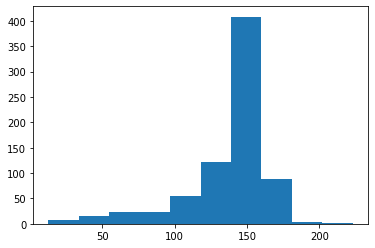

In [ ]:
plt.hist(data[data.labels == 'spam']['Message'].apply(len),)

(array([3.615e+03, 1.075e+03, 7.400e+01, 3.800e+01, 1.400e+01, 3.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  92.8, 183.6, 274.4, 365.2, 456. , 546.8, 637.6, 728.4,
        819.2, 910. ]),
 <a list of 10 Patch objects>)

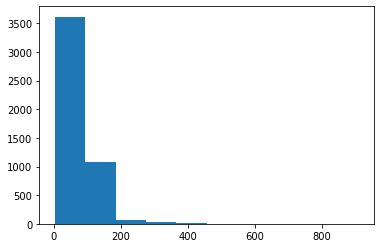

In [ ]:
plt.hist(data[data.labels == 'ham']['Message'].apply(len), )

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=textpreprocessor)
finalWordVectorCreator = wordVector.fit(data['Message'])

In [ ]:
bag_of_words= finalWordVectorCreator.transform(data['Message'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_idf = TfidfTransformer().fit(bag_of_words)  # TF-IDF

In [ ]:
#Create Features

features= tf_idf.transform(bag_of_words)

# Model Creation and Prediction


In [ ]:
from sklearn.naive_bayes import MultinomialNB #Best for Text Data Features
model = MultinomialNB()
model.fit(features,data['labels'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model.score(features,data['labels'])

0.9793610911701364

## Prediction given by model


In [ ]:
#Realtime Input Example
inputSMS = input("Enter SMS to check: ")
preprocessing = textpreprocessor(inputSMS)
bowText = finalWordVectorCreator.transform(preprocessing)
featureText = tf_idf.transform(bowText)
predict = model.predict(featureText)[0]
print("Given SMS is a {} SMS".format(predict))

Enter SMS to check: Win Lottery Guaranteed!!!
Given SMS is a spam SMS
